In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 145s 2ms/step - loss: 0.2710 - acc: 0.9167 - val_loss: 0.0670 - val_acc: 0.9789
Epoch 2/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0892 - acc: 0.9740 - val_loss: 0.0424 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0672 - acc: 0.9797 - val_loss: 0.0389 - val_acc: 0.9860
Epoch 4/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0566 - acc: 0.9832 - val_loss: 0.0327 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0475 - acc: 0.9853 - val_loss: 0.0305 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0425 - acc: 0.9868 - val_loss: 0.0275 - val_acc: 0.9911
Epoch 7/12
60000/60000 [=========================

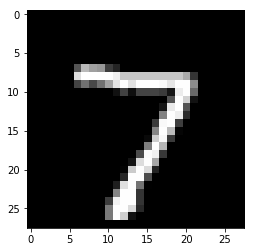

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28,28), cmap="gray")

In [11]:
from keras.models import load_model

model.save('mldata\keras_digits.h5')

In [17]:
model.predict_classes(x_test[0].reshape(1,28,28,1))

array([7])